# Data Pre-Processing

This is a really difficult part in data science because it's open ended which means there isn't really a strict benchmark or way to pre-process data. There are certain rule of thumbs I will point out for data pre-processing and intuition that guides the discussion. Many times it's the case that your data science goals drive how you pre-process the data. Sometimes certain types or levels of pre-processing are obvious such as when we have empty entries or rows and columns of data alltogether.

We'll move swiftly through the pipeline to grab an intuition at data pre-processing and defer detailed discussions to another module.

> There are 6 different data pre-processing recipes for machine learning that you will frequent.
- Case by Case Data Preparation
- Data Imputing
- Feature Scaling 
- Binarizing Categorical Variables
- Normalizing

We mentioned in the previous module that we are ditching the Facebook dataset and opting for a new one just for freshness. We're also going to start from scratch and go through the entire pipeline that was outlined up to this module for review purposes.

## Introducing the new dataset

The dataset is called "the_numbers_raw.csv", and it's named after a movie information website called "The Numbers." I'm actually really familiar with this dataset because I procured a small sample of the website. You can probably procure tens of thousands of movies, but I opted for 500 movies just for instructional purposes.

"[The Numbers](http://www.the-numbers.com/) was officially launched on October 17th, 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies. Since its humble early beginnings, with just 300 tracked movies, the site has grown to become the largest freely available database of movie industry information on the web." - From Their Website

If you are curious as to how I procured the data, please see the optional file <a href="./optional/the numbers web scraper.ipynb">"the numbers web scraper.ipynb"</a>

### Noting the Path, Size and Structure of the File

In [1]:
file_path = './data_files/the_numbers_raw.csv'

In [2]:
!ls -l $file_path # it's 56.5 kilobytes so we're good to read in the file 

-rw-r--r--  1 dhexonian  staff  313580 Feb 25 04:05 ./data_files/the_numbers_raw.csv


In [3]:
!head -2 $file_path # read the first few lines of the file 

Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,Release,Domestic DVD Sales,Domestic Blu-ray Sales,Total Domestic Video Sales,Critic Rating,Wknd 1 Rank,Wknd 1 Gross,Wknd 1 %Change,Wknd 1 # Theaters,Wknd 1 GPT,Week 1 TG,Wknd 2 Rank,Wknd 2 Gross,Wknd 2 %Change,Wknd 2 # Theaters,Wknd 2 GPT,Week 2 TG,Wknd 3 Rank,Wknd 3 Gross,Wknd 3 %Change,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG
12/18/2009,Avatar,"$425,000,000","$760,507,625","$2,783,918,982",http://www.the-numbers.com/movie/Avatar#tab=summary,Action,162 minutes,"PG-13 for intense epic battle sequences and warfare, sensuality, language and some smoking.(Rating bulletin 2133, 8/11/2010)","Dune Entertainment, 20th Century Fox, Ingenious Film Partners","December 18th, 2009 (Wide) by 20th Century FoxDecember 18th, 2009 (IMAX) by 20th Century FoxAugust 27th, 2010 (IMAX) by 20th Century Fox, released as Ava

### Initial Impressions

- It looks like this file's first row consists of column names and the data starts from the second row.
- The data looks to be comma delimited unlike our previous semi-colon delimited Facebook data 
- The data looks clean. There doesn't seem to be any supporting comments written in the data that we have to remove. 
- Seems like there's some data munging to be done. Note the $ and % signs that are going to be undesirable when doing data analysis.

### Importing the necessary packages

In [4]:
import pandas as pd 
import numpy as np 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt       
from dateutil.parser import parse 
import re 
%matplotlib inline                    

### Reading and Understand Your Data

In [5]:
file_path = './data_files/the_numbers_raw.csv'
df = pd.read_csv(file_path)

In [308]:
df.columns # note what kind of columns we have 

Index([u'Release Date', u'Title', u'Production Budget', u'Domestic Gross',
       u'Worldwide Gross', u'Url', u'Genre', u'Runtime', u'MPAA',
       u'Production Companies', u'Release', u'Domestic DVD Sales',
       u'Domestic Blu-ray Sales', u'Total Domestic Video Sales',
       u'Critic Rating', u'Wknd 1 Rank', u'Wknd 1 Gross', u'Wknd 1 %Change',
       u'Wknd 1 # Theaters', u'Wknd 1 GPT', u'Week 1 TG', u'Wknd 2 Rank',
       u'Wknd 2 Gross', u'Wknd 2 %Change', u'Wknd 2 # Theaters', u'Wknd 2 GPT',
       u'Week 2 TG', u'Wknd 3 Rank', u'Wknd 3 Gross', u'Wknd 3 %Change',
       u'Wknd 3 # Theaters', u'Wknd 3 GPT', u'Week 3 TG', u'Wknd 4 Rank',
       u'Wknd 4 Gross', u'Wknd 4 %Change', u'Wknd 4 # Theaters', u'Wknd 4 GPT',
       u'Week 4 TG'],
      dtype='object')

Just for clarity in terms of understand our columns, TG stands for Total Gross and GPT stands for Gross Per Theater. GPT is simply TG / # Theaters.

In [309]:
len(df.columns) # use len to understand just how many columns there are 

39

In [310]:
df.index # use index to view our index 

RangeIndex(start=0, stop=500, step=1)

In [311]:
len(df.index) # confirm we have 2183 rows of data

500

With the shape method we can figure out the dimensions of our entire DataFrame alltogether

In [312]:
df.shape

(500, 39)

In [313]:
df.head(3) # we can use either head, tail or sample to get a preview of the DataFrame 

,Release Date,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,...,Wknd 3 %Change,Wknd 3 # Theaters,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG
0,12/18/2009,Avatar,"$425,000,000","$760,507,625","$2,783,918,982",http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162 minutes,PG-13 for intense epic battle sequences and wa...,"Dune Entertainment, 20th Century Fox, Ingeniou...",...,-9%,"3,461","$19,789","$352,114,898",17.0,"$50,306,217",-27%,"3,422","$14,701","$430,846,514"
1,12/18/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,058,662,225",http://www.the-numbers.com/movie/Star-Wars-Ep-...,Adventure,136 minutes,PG-13 for sci-fi action violence.(Rating bulle...,"Lucasfilm, Bad Robot",...,-40%,"4,134","$21,829","$742,208,942",17.0,"$42,353,785",-53%,"4,134","$10,245","$812,734,828"
2,5/24/2007,Pirates of the Caribbean: At World’s End,"$300,000,000","$309,420,425","$963,420,425",http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167 minutes,PG-13 for intense sequences of action/adventur...,"Walt Disney Pictures, Jerry Bruckheimer",...,-52%,"4,002","$5,283","$253,441,723",17.0,"$12,411,786",-41%,"3,329","$3,728","$274,145,510"


Note that because the DataFrame is so wide (39 columns wide to be exact) Jupyter Notebook provides a horizontal scrollbar for us to look at columns of data which don't fit on our window.

In [314]:
df.info() # return number of non-null values and data type of each column via info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
Release Date                  500 non-null object
Title                         500 non-null object
Production Budget             500 non-null object
Domestic Gross                500 non-null object
Worldwide Gross               500 non-null object
Url                           500 non-null object
Genre                         500 non-null object
Runtime                       465 non-null object
MPAA                          497 non-null object
Production Companies          447 non-null object
Release                       499 non-null object
Domestic DVD Sales            318 non-null object
Domestic Blu-ray Sales        270 non-null object
Total Domestic Video Sales    318 non-null object
Critic Rating                 334 non-null object
Wknd 1 Rank                   497 non-null object
Wknd 1 Gross                  497 non-null object
Wknd 1 %Change                497 non-null ob

> Note that each column has varying numbers of non-null objects. 

We have missing values. Note that we have all 500 release dates for our 500 movies but we only have 270 Domestic Blu-ray Sales. We can hypothesize that this is probably because some movies weren't popular enough to warrant a Blu-Ray release. Or it could be the case that some movies were not of the time that Blu-Rays were a thing. We will revisit what to do with missing values in a bit. 

In [315]:
df.describe() # return aggregate statistics via describe() method

,Wknd 2 Rank,Wknd 3 Rank,Wknd 4 Rank
count,497.000000,496.000000,495.000000
mean,3.730382,10.731855,17.733333
std,7.649303,7.656955,7.664630
min,3.000000,10.000000,17.000000
25%,3.000000,10.000000,17.000000
50%,3.000000,10.000000,17.000000
75%,3.000000,10.000000,17.000000
max,173.000000,180.000000,187.000000


> Uh oh...

We'd like for our describe() method to return aggregate statistics for each of our columns. However we are given aggregate statistics for only three columns: "Wknd 2 Rank, WKnd 3 Rank and Wknd 4 Rank." This is because the describe method() is unfamiliar with handling columns with data type: "non-null object". The intuition is that describe() cannot calculate statistics such as percentiles, averages and standard deviations for non-integer and non-float (numeric) data types. It's impossible to calculate the standard deviation of MPAA ratings, so describe() won't pretend to do it.

The three columsn "Wknd 2 Rank, WKnd 3 Rank and Wknd 4 Rank" are non-null float64 which is recognizable and calculatable. 

We need to do some data pre-processing. Thankfully we did some preliminary data exploration!

In [316]:
# to confirm the data type of a single DataFrame column / also known as Series use dtype method
df['Wknd 2 Rank'].dtype 

dtype('float64')

In [317]:
# non-null object "O"
df['Wknd 2 Gross'].dtype 

dtype('O')

### Visualizing the Data

We can visualize the data right now, but note that one could argue that through data exploration we have an intuition that it could be wise to draft a plan of action for tackling null values and the data types of each column before data visualization.

Let's just do brute force data visualization and see where we get.

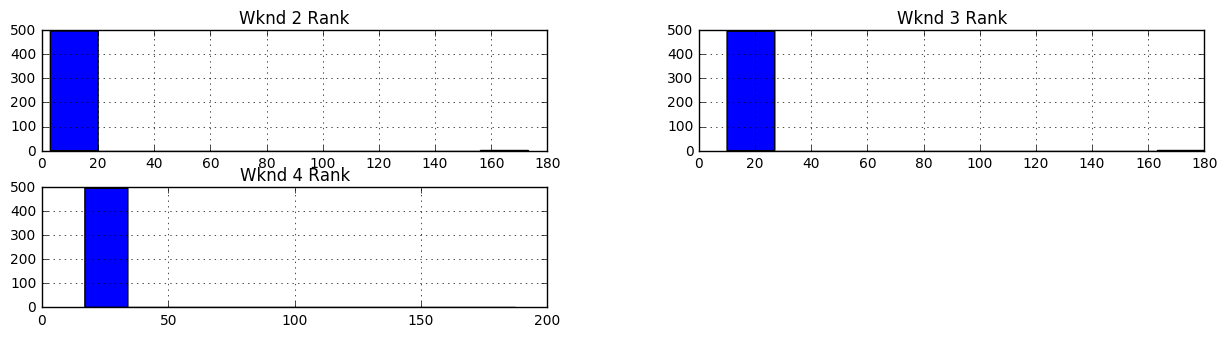

In [318]:
# let's create a histogram of each column 
df.hist(figsize=(15,40),layout=(20,2),sharex=False, sharey=False) # use the hist method to create a histogram of each feature
plt.show()

> Not again... We've only rendered three histograms. It's becoming pretty clear that we need to do some pre-processing before undergoing any serious data exploration and visualization.

The fact that we can't properly visualize our data without data pre-processing is pretty much an invincible argument for undergoing data pre-processing right after reading in the data. 

### Referring back to Data Pre-Processing

- Case by Case Problems w/ Messy Data 
- Data Imputing
- Feature Scaling 
- Binarizing Categorical Variables
- Normalizing

We will try to go in top to bottom order and start tackling the problem of handling messy data.

In [319]:
df.ix[0] # view first row of our data via ix

Release Date                                                         12/18/2009
Title                                                                    Avatar
Production Budget                                                  $425,000,000
Domestic Gross                                                     $760,507,625
Worldwide Gross                                                  $2,783,918,982
Url                           http://www.the-numbers.com/movie/Avatar#tab=su...
Genre                                                                    Action
Runtime                                                             162 minutes
MPAA                          PG-13 for intense epic battle sequences and wa...
Production Companies          Dune Entertainment, 20th Century Fox, Ingeniou...
Release                       December 18th, 2009 (Wide) by 20th Century Fox...
Domestic DVD Sales                                                 $232,620,406
Domestic Blu-ray Sales                  

From looking at our data, we want to be mindful of doing the following.

1. Remove $ sign for columns related to revenue/sales and change numeric numeric data into float64 objects 
2. Ensure that the release date data is in the appropriate datetime format 
3. Remove "minutes" for the Runtime data
4. Get only the MPAA Rating without the additional commentary 
5. There are two critic ratings: audience and critic rating. Remove the text and procure just the two numbers as two separate columns.
6. Remove any columns as needed depending on your data science problem     

### Cleaning

In [43]:
# we will defer detailed discussion of data munging to a later pandas and numpy module

def scrubber(file):
    
    df = pd.read_csv(file)
    
    columns_to_scrub = ['Production Budget','Domestic Gross','Worldwide Gross','Domestic DVD Sales','Domestic Blu-ray Sales','Total Domestic Video Sales','Wknd 1 Rank','Wknd 1 Gross','Wknd 1 # Theaters','Wknd 1 GPT','Week 1 TG', 'Wknd 2 Rank','Wknd 2 Gross','Wknd 2 %Change','Wknd 2 # Theaters','Wknd 2 GPT','Week 2 TG','Wknd 3 Rank','Wknd 3 Gross','Wknd 3 %Change','Wknd 3 # Theaters','Wknd 3 GPT','Week 3 TG','Wknd 4 Rank','Wknd 4 Gross','Wknd 4 %Change','Wknd 4 # Theaters','Wknd 4 GPT','Week 4 TG']
    
    for column in columns_to_scrub:
        df[column] = df[column].map(lambda x: (re.sub('[$|,|%]','',str(x)))) 
            
    df['Runtime'] = df['Runtime'].astype(str).map(lambda x: x.split()[0])

    df['MPAA'] = df['MPAA'].astype(str).map(lambda x: x.split()[0])  
    
    df['Critic Rating'] = df['Critic Rating'].astype(str).map(lambda x: x.strip())        
    df['Release Date'] = df['Release Date'].apply(lambda x: parse(x))
    
    return df 

def split_critic(df):
    
    list_of_rating = df['Critic Rating'].tolist()

    total_rating = [] 
    
    for rating_string in list_of_rating:
        
        if rating_string == 'nan' or len(rating_string)==0 or re.findall('\d+%',rating_string)==[]: 
            total_rating.append([0,0])
        elif len(re.findall('\d+%',rating_string))==1:
            total_rating.append([re.findall('\d+%',rating_string)[0],re.findall('\d+%',rating_string)[0]])
        else:
            list_pair = re.findall('\d+%',rating_string)
            total_rating.append(list_pair)

    critic_rate, audience_rate = zip(*total_rating)
    
    df['Critic Rate'] = map(lambda x: re.sub('[$|,|%]','',str(x)),critic_rate)
    df['Audience Rate'] = map(lambda x: re.sub('[$|,|%]','',str(x)),audience_rate)
    df.drop(['Critic Rating','Wknd 1 %Change','Release Date'],axis=1, inplace=True)
    df = df.replace('nan',np.nan)
    return df 

df = scrubber('./data_files/the_numbers_raw.csv')
df = split_critic(df)

In [34]:
df.ix[0] 

Title                                                                    Avatar
Production Budget                                                     425000000
Domestic Gross                                                        760507625
Worldwide Gross                                                      2783918982
Url                           http://www.the-numbers.com/movie/Avatar#tab=su...
Genre                                                                    Action
Runtime                                                                     162
MPAA                                                                      PG-13
Production Companies          Dune Entertainment, 20th Century Fox, Ingeniou...
Release                       December 18th, 2009 (Wide) by 20th Century Fox...
Domestic DVD Sales                                                    232620406
Domestic Blu-ray Sales                                                161906125
Total Domestic Video Sales              

### Data Imputing 

We've noted that some entries are going to be null or missing. This means that we have to make an executive decision as to whether or not we want to drop rows of data that have missing data or figure out a way to make an educated guess and fill those null values. Finding a way to make sound estimates to replace null values is called data imputing.

> 7 Frequented Options

1. Imputate by the median or mean of the entire column for continuous features and the mode for categorical features.
2. Plot a distribution (histogram if binning or particular density distribution) of the column and take a random sample from that distribution. 
3. Record the rows with null values. Model data on rows of complete data. Then make use the model to make probabilistic assessments of which value in place of the null value will maximize the likelihood of the data given the non-null values that exist in the same row. 
4. Remove rows that have null values alltogether. Can't risk bad guesses. 
5. Remove columns that have a lot of null values. Some columns weren't that meaningful anyways. 
6. Manual sourcing.
7. Something else.
    

### Let's actually view what null values look like in a DataFrame

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
Title                         500 non-null object
Production Budget             500 non-null object
Domestic Gross                500 non-null object
Worldwide Gross               500 non-null object
Url                           500 non-null object
Genre                         500 non-null object
Runtime                       465 non-null object
MPAA                          497 non-null object
Production Companies          447 non-null object
Release                       499 non-null object
Domestic DVD Sales            318 non-null object
Domestic Blu-ray Sales        270 non-null object
Total Domestic Video Sales    318 non-null object
Wknd 1 Rank                   497 non-null object
Wknd 1 Gross                  497 non-null object
Wknd 1 # Theaters             497 non-null object
Wknd 1 GPT                    497 non-null object
Week 1 TG                     497 non-null ob

Note that Domestic Blu-ray Sales column has the least number of non-null values which means it has the most number of null values.

In [45]:
df['Domestic Blu-ray Sales'].isnull() # isnull() method returns True if null else False 

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
470     True
471     True
472     True
473     True
474     True
475    False
476    False
477     True
478     True
479    False
480     True
481    False
482     True
483     True
484     True
485     True
486    False
487     True
488     True
489     True
490    False
491     True
492    False
493     True
494     True
495     True
496    False
497     True
498    False
499     True
Name: Domestic Blu-ray Sales, dtype: bool

You see how long that output was? From now on when I can conserve space in our Notebook I will use the head, tail or sample command to get a shorter output.

In [46]:
# this is what null values look like: NaN
# note that I use head() to output five line items, five is the default, but you can specify how many by head(number)
df['Domestic Blu-ray Sales'].ix[df['Domestic Blu-ray Sales'].isnull()].head() 

17    NaN
22    NaN
32    NaN
33    NaN
34    NaN
Name: Domestic Blu-ray Sales, dtype: object

Remember from data type module that loc in the context of DataFrames can take in a row(s) name/index, column(s) name/index pair! 

Let's do this to view for which Titles we have null values for Runtime.

In [48]:
# loc can take two arguments as (row name/index, col name/index)
# df['Runtime'].isnull() is our row index 
# ['Title','Runtime'] is a list of column names 
df.loc[df['Domestic Blu-ray Sales'].isnull(),['Title','Domestic Blu-ray Sales']].head()

,Title,Domestic Blu-ray Sales
17,Superman Returns,NaN
22,The Chronicles of Narnia: Prince Caspian,NaN
32,The Golden Compass,NaN
33,Titanic,NaN
34,Rogue One: A Star Wars Story,NaN


> Wait what? Weren't some of these movies incredibly popular and modern enough to warrant a Blu-ray release?

That's peculiar. And this leaves us an important lesson: data is messy. Note that as we are data munging, we are getting to learn more and more about our data. Often times, I find myself revisiting data exploration and visualization as I am doing pre-processing to better gauge how I should clean my data and best position it to accomplish our data science goals.

### If we opt to remove rows with null values for Domestic Blu-Ray Sales

In [49]:
df.info() # note the number of non-null in each column before dropping rows with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
Title                         500 non-null object
Production Budget             500 non-null object
Domestic Gross                500 non-null object
Worldwide Gross               500 non-null object
Url                           500 non-null object
Genre                         500 non-null object
Runtime                       465 non-null object
MPAA                          497 non-null object
Production Companies          447 non-null object
Release                       499 non-null object
Domestic DVD Sales            318 non-null object
Domestic Blu-ray Sales        270 non-null object
Total Domestic Video Sales    318 non-null object
Wknd 1 Rank                   497 non-null object
Wknd 1 Gross                  497 non-null object
Wknd 1 # Theaters             497 non-null object
Wknd 1 GPT                    497 non-null object
Week 1 TG                     497 non-null ob

Give me the DataFrame should I choose to remove rows of data with null values for Domestic Blu-ray Sales.

In [79]:
# : signifies that we want to summon the index containing all columns 
# hence equivalently df.ix[df['Domestic Blu-ray Sales'].notnull(),df.columns].head()
df.ix[df['Domestic Blu-ray Sales'].notnull(),:].head()

,Title,Production Budget,Domestic Gross,Worldwide Gross,Url,Genre,Runtime,MPAA,Production Companies,Release,...,Wknd 3 GPT,Week 3 TG,Wknd 4 Rank,Wknd 4 Gross,Wknd 4 %Change,Wknd 4 # Theaters,Wknd 4 GPT,Week 4 TG,Critic Rate,Audience Rate
0,Avatar,425000000,760507625,2783918982,http://www.the-numbers.com/movie/Avatar#tab=su...,Action,162,PG-13,"Dune Entertainment, 20th Century Fox, Ingeniou...","December 18th, 2009 (Wide) by 20th Century Fox...",...,19789,352114898,17.0,50306217,-27,3422,14701,430846514,83,82
1,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2058662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,Adventure,136,PG-13,"Lucasfilm, Bad Robot","December 18th, 2015 (IMAX) by Walt DisneyDecem...",...,21829,742208942,17.0,42353785,-53,4134,10245,812734828,0,0
2,Pirates of the Caribbean: At World’s End,300000000,309420425,963420425,http://www.the-numbers.com/movie/Pirates-of-th...,Adventure,167,PG-13,"Walt Disney Pictures, Jerry Bruckheimer","May 24th, 2007 (Wide) by Walt Disney, released...",...,5283,253441723,17.0,12411786,-41,3329,3728,274145510,0,0
3,Spectre,300000000,200074175,879620923,http://www.the-numbers.com/movie/Spectre#tab=s...,Action,148,PG-13,Eon Productions,"November 6th, 2015 (Wide) by Sony PicturesNove...",...,4111,154146608,17.0,12887772,-14,2940,4384,176125179,0,0
4,The Dark Knight Rises,275000000,448139099,1084439099,http://www.the-numbers.com/movie/Dark-Knight-R...,Action,164,PG-13,"Warner Bros., Legendary Pictures, Syncopy","July 20th, 2012 (Wide) by Warner Bros.July 20t...",...,8425,353935094,17.0,18979397,-47,3690,5143,389588216,87,90


Because Domstic Blu-ray Sales has 270 non-null objects what we expect at the most optimal condition is for 270 rows to remain in our DataFrame. Note that this is only when null values exist in complete rows.

In [78]:
df.ix[df['Domestic Blu-ray Sales'].notnull(),:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 498
Data columns (total 38 columns):
Title                         270 non-null object
Production Budget             270 non-null object
Domestic Gross                270 non-null object
Worldwide Gross               270 non-null object
Url                           270 non-null object
Genre                         270 non-null object
Runtime                       268 non-null object
MPAA                          270 non-null object
Production Companies          262 non-null object
Release                       270 non-null object
Domestic DVD Sales            270 non-null object
Domestic Blu-ray Sales        270 non-null object
Total Domestic Video Sales    270 non-null object
Wknd 1 Rank                   270 non-null object
Wknd 1 Gross                  270 non-null object
Wknd 1 # Theaters             270 non-null object
Wknd 1 GPT                    270 non-null object
Week 1 TG                     270 non-null ob

### If we opt to remove rows with null values for any column

In [81]:
df_dropna = df.dropna() # dropna() method does the trick 
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 498
Data columns (total 38 columns):
Title                         262 non-null object
Production Budget             262 non-null object
Domestic Gross                262 non-null object
Worldwide Gross               262 non-null object
Url                           262 non-null object
Genre                         262 non-null object
Runtime                       262 non-null object
MPAA                          262 non-null object
Production Companies          262 non-null object
Release                       262 non-null object
Domestic DVD Sales            262 non-null object
Domestic Blu-ray Sales        262 non-null object
Total Domestic Video Sales    262 non-null object
Wknd 1 Rank                   262 non-null object
Wknd 1 Gross                  262 non-null object
Wknd 1 # Theaters             262 non-null object
Wknd 1 GPT                    262 non-null object
Week 1 TG                     262 non-null ob

We see that we are left with 262 rows of data which is far from ideal because we've wiped away half of our data. Let's consider removing columns which have many null values. I feel like the Blu-ray, Video and DVD Sales columns are dragging us down incredibly, and they're coming a hassle.

### Removing Columns Which Have Many Null Values 

Let's go back to our original DataFrame df, and not df_dropna

In [82]:
# unlike info count returns a Series (single column DataFrame) that has the number of non-null objects as values column names as index
df.count() 

Title                         500
Production Budget             500
Domestic Gross                500
Worldwide Gross               500
Url                           500
Genre                         500
Runtime                       465
MPAA                          497
Production Companies          447
Release                       499
Domestic DVD Sales            318
Domestic Blu-ray Sales        270
Total Domestic Video Sales    318
Wknd 1 Rank                   497
Wknd 1 Gross                  497
Wknd 1 # Theaters             497
Wknd 1 GPT                    497
Week 1 TG                     497
Wknd 2 Rank                   497
Wknd 2 Gross                  496
Wknd 2 %Change                496
Wknd 2 # Theaters             496
Wknd 2 GPT                    496
Week 2 TG                     496
Wknd 3 Rank                   496
Wknd 3 Gross                  495
Wknd 3 %Change                495
Wknd 3 # Theaters             495
Wknd 3 GPT                    495
Week 3 TG     

In [14]:
df.count().sort_values() # use sort_values() to order the Series from least to greatest 

Domestic Blu-ray Sales        270
Domestic DVD Sales            318
Total Domestic Video Sales    318
Production Companies          447
Runtime                       465
Week 4 TG                     492
Wknd 4 GPT                    492
Wknd 4 # Theaters             492
Wknd 4 %Change                492
Wknd 4 Gross                  492
Wknd 4 Rank                   495
Wknd 3 GPT                    495
Wknd 3 Gross                  495
Week 3 TG                     495
Wknd 3 %Change                495
Wknd 3 # Theaters             495
Wknd 3 Rank                   496
Week 2 TG                     496
Wknd 2 GPT                    496
Wknd 2 Gross                  496
Wknd 2 %Change                496
Wknd 2 # Theaters             496
Wknd 2 Rank                   497
Wknd 1 GPT                    497
Wknd 1 # Theaters             497
Wknd 1 Rank                   497
MPAA                          497
Week 1 TG                     497
Wknd 1 Gross                  497
Release       

We can make a strong argument for dropping the three columns with the most null values
1. Domestic Blu-ray Sales        
2. Total Domestic Video Sales    
3. Domestic DVD Sales            

Note that because there are so many null values in these three columns, imputing via a statistical metric such as mean would be unwise. Half the data in those columns just can't be generalized to a mean.

In [85]:
# use list comprehension to return columns that are not one of the three that we want to remove
cols = [col for col in df.columns if col not in ['Domestic DVD Sales','Domestic Blu-ray Sales', 'Total Domestic Video Sales']]
cols

['Title',
 'Production Budget',
 'Domestic Gross',
 'Worldwide Gross',
 'Url',
 'Genre',
 'Runtime',
 'MPAA',
 'Production Companies',
 'Release',
 'Wknd 1 Rank',
 'Wknd 1 Gross',
 'Wknd 1 # Theaters',
 'Wknd 1 GPT',
 'Week 1 TG',
 'Wknd 2 Rank',
 'Wknd 2 Gross',
 'Wknd 2 %Change',
 'Wknd 2 # Theaters',
 'Wknd 2 GPT',
 'Week 2 TG',
 'Wknd 3 Rank',
 'Wknd 3 Gross',
 'Wknd 3 %Change',
 'Wknd 3 # Theaters',
 'Wknd 3 GPT',
 'Week 3 TG',
 'Wknd 4 Rank',
 'Wknd 4 Gross',
 'Wknd 4 %Change',
 'Wknd 4 # Theaters',
 'Wknd 4 GPT',
 'Week 4 TG',
 'Critic Rate',
 'Audience Rate']

In [86]:
df = df[cols]

In [87]:
df.count().sort_values() # Voila much better!

Production Companies    447
Runtime                 465
Week 4 TG               492
Wknd 4 GPT              492
Wknd 4 # Theaters       492
Wknd 4 %Change          492
Wknd 4 Gross            492
Wknd 3 GPT              495
Wknd 3 Gross            495
Week 3 TG               495
Wknd 3 # Theaters       495
Wknd 3 %Change          495
Wknd 4 Rank             495
Wknd 2 # Theaters       496
Wknd 3 Rank             496
Week 2 TG               496
Wknd 2 GPT              496
Wknd 2 %Change          496
Wknd 2 Gross            496
Wknd 2 Rank             497
Week 1 TG               497
Wknd 1 # Theaters       497
Wknd 1 Gross            497
Wknd 1 Rank             497
MPAA                    497
Wknd 1 GPT              497
Release                 499
Title                   500
Genre                   500
Url                     500
Worldwide Gross         500
Domestic Gross          500
Production Budget       500
Critic Rate             500
Audience Rate           500
dtype: int64

'Domestic DVD Sales','Domestic Blu-ray Sales' and 'Total Domestic Video Sales' really did make us suffer. We still have null values, and it looks like Production Companies and Runtime have the most amount of null-values with 52 and 35 respectively.

### Imputing by the Mean, Median or Mode

First consider which columns make sense to compute the mean, median or mode for data imputing. While categorical variables can be imputed via the mode, the mean and median don't make sense. For continuous variables like revenue, it does make sense to calculate the mean and median.  

For us to even calculate the mean, median or mode of a column we have to consider the data type of each column. They have to be integer or floats for the mean(), median() and mode() method to work.

Let's check out the data type of 'Runtime'.


In [88]:
df['Runtime'].dtype # object type 

dtype('O')

In [89]:
df['Runtime'].mean() # will output error because it can't calculate the mean of "objects"

TypeError: cannot concatenate 'str' and 'int' objects

In [90]:
# before imputing obviously there are Title's with null values for Runtime 
df.loc[df['Runtime'].isnull(),['Title','Runtime']]

,Title,Runtime
32,The Golden Compass,NaN
72,Valerian and the City of a Thousand Planets,NaN
87,Singularity,NaN
114,Poseidon,NaN
150,Beowulf,NaN
249,The Chronicles of Riddick,NaN
260,Dante's Peak,NaN
263,Astérix aux Jeux Olympiques,NaN
286,Home on the Range,NaN
287,Speed 2: Cruise Control,NaN


In [91]:
df.loc[df['Runtime'].isnull(),['Title','Runtime']].index # we're going to preserve this to see if imputing worked

Int64Index([ 32,  72,  87, 114, 150, 249, 260, 263, 286, 287, 299, 307, 327,
            330, 331, 332, 335, 345, 346, 354, 373, 374, 397, 398, 404, 405,
            408, 439, 442, 443, 448, 450, 454, 495, 497],
           dtype='int64')

In [92]:
index_of_null_runtime = df.loc[df['Runtime'].isnull(),['Title','Runtime']].index

In [93]:
df['Runtime'] = df['Runtime'].astype('float64') # change the type of Runtime column into float64

In [94]:
df['Runtime'].dtype

dtype('float64')

In [96]:
# calculate the mean 'Runtime'
df['Runtime'].mean()

119.46021505376343

In [118]:
runtime_mean = df['Runtime'].mean()
df['Runtime'].fillna(runtime_mean, inplace=True) # fillna() will replace null entries with the argument (runtime_mean)

inplace=True argument tells our DataFrame df that we'd like to make for fillna() to make a permanent change

In [25]:
df.loc[df['Runtime'].isnull(),['Title','Runtime']] # there are no null values in the Runtime column so

,Title,Runtime


In [26]:
df.loc[index_of_null_runtime,['Title','Runtime']] # note that the Runtime for the movies with null values for Runtime is equal to the mean Runtime

,Title,Runtime
32,The Golden Compass,119.460215
72,Valerian and the City of a Thousand Planets,119.460215
87,Singularity,119.460215
114,Poseidon,119.460215
150,Beowulf,119.460215
249,The Chronicles of Riddick,119.460215
260,Dante's Peak,119.460215
263,Astérix aux Jeux Olympiques,119.460215
286,Home on the Range,119.460215
287,Speed 2: Cruise Control,119.460215


In [27]:
df.count().sort_values() 

Production Companies    447
Week 4 TG               492
Wknd 4 GPT              492
Wknd 4 # Theaters       492
Wknd 4 %Change          492
Wknd 4 Gross            492
Wknd 3 GPT              495
Wknd 4 Rank             495
Wknd 3 %Change          495
Wknd 3 Gross            495
Wknd 3 # Theaters       495
Week 3 TG               495
Wknd 3 Rank             496
Week 2 TG               496
Wknd 2 GPT              496
Wknd 2 # Theaters       496
Wknd 2 %Change          496
Wknd 2 Gross            496
Wknd 2 Rank             497
Week 1 TG               497
Wknd 1 GPT              497
Wknd 1 Gross            497
Wknd 1 Rank             497
MPAA                    497
Wknd 1 # Theaters       497
Release                 499
Title                   500
Runtime                 500
Genre                   500
Url                     500
Worldwide Gross         500
Domestic Gross          500
Production Budget       500
Critic Rate             500
Audience Rate           500
dtype: int64

The next candidate for data imputing is Production Companies column which has 447 non-null object. This is where I would consider <b>manual sourcing</b>.

### Manual Sourcing

It's certaintly tedious but not difficult to procure 53 production companies to fill our null values for that column. After all we have all of the movie titles! I don't think it's that much effort to Google search 53 movie titles and find their production companies.

In [28]:
df.loc[df['Production Companies'].isnull(),['Title','Production Companies']]

,Title,Production Companies
18,Quantum of Solace,NaN
32,The Golden Compass,NaN
83,The Mummy: Tomb of the Dragon Emperor,NaN
94,Terminator 3: Rise of the Machines,NaN
107,Inception,NaN
114,Poseidon,NaN
164,Sahara,NaN
166,Die Another Day,NaN
172,Lethal Weapon 4,NaN
184,Final Fantasy: The Spirits Within,NaN


I know for a fact that Eon Productions produced Quantum of Solace, so I'll go ahead and add it.

In [ ]:
# first find the index of the row that has the movie 'Quantum of Solace'
# we can visually see that it's 18 from above

In [106]:
df.loc[18, 'Production Companies'] = 'Eon Productions'

In [111]:
df.loc[18, :].head()

Title                                                Quantum of Solace
Production Budget                                            230000000
Domestic Gross                                               169368427
Worldwide Gross                                              591692078
Url                  http://www.the-numbers.com/movie/Quantum-of-So...
Name: 18, dtype: object

It turns out that I am not going to fill in the rest of missing production companies via manual sourcing. Maybe you can!

> The point is that sometimes manual sourcing is necessary, albeit inconvenient.

### Imputing From a Distribution 

The intuition is as follows. Suppose we have a data set of student weights measured during physical education class. Certain students weren't present in class to take measurements, so we have some missing values. Suppose that the distribution of weights are Gaussian (follow Bell curve). 

What we can to fill in the null values is then to take a random sample from that Gaussian distribution of student weights. This is a scenario when we are working with single column or feature data.  

Often times we are working with many columns and they are going to be correlated which means that we're going to have to work with multi-dimensional probability distributions which are difficult and complex to get it right. 

> To put the complicated mathematics aside and move on, we'll defer this discussion to another module.

Wow that was a lot. Let's take a break and continue on with the rest in the next module.
- Feature Scaling 
- Binarizing Categorical Variables
- Normalizing


### Saving the Data

Let's save our DataFrame in its own comma separated value data file and work on it in our next module.

In [120]:
# saving this DataFrame into a CSV and naming it 5.1_csv located in our data_files directory
df.to_csv('./data_files/5.1_csv')

### All in all we learned: 

- Case by Case Data Preparation
- Data Imputing

### Additional Takeaways:

Sometimes it's the case that the data is so messy that minimal data pre-processing should be the first step before conducting data exploration and visualization. 

However do note that had data exploration and visualization not been conducted, we might not have spotted the messiness of the data. Sometimes the messiness is obvious. Sometimes not so much. 

I always recommend basic data exploration and visualization before data pre-processing. Not only will they inspire us to understand our data better and frame good questions, they will also help us brainstorm different pre-processing techniques to clean our data in a desirable way.

> The more data science projects you work on the better intuition you obtain for what kind of pre-processing you have to do on certain types of data.

Admittedly, we still have null_values, and we'd like to remove all of them in our next module. 

# We're Done!

This tutorial closely follows my Medium blog [@dhexonian](http://medium.com/@dhexonian).

If you have any questions or requests please Tweet those to me, also [@dhexonian](https://twitter.com/dhexonian) 